In [1]:
import pandas as pd
import numpy as np
import pickle
import sklearn.preprocessing

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.style.use('seaborn-whitegrid')
import pickle


In [2]:
pickle_in = open('nyc_data.pickle' , "rb")
df_train = pickle.load(pickle_in)
df_train = pd.DataFrame(df_train)
df_train['pickup_datetime'] = pd.to_datetime(df_train['pickup_datetime'])

In [3]:
df_train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1


In [4]:
df_train.dtypes

key                               object
fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

In [5]:
df_train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,1.957504e+06,1.957504e+06,1.957504e+06,1.957504e+06,1.957504e+06,1.957504e+06
mean,1.132121e+01,-7.397513e+01,4.075108e+01,-7.397423e+01,4.075144e+01,1.684257e+00
std,9.663268e+00,3.837029e-02,2.950551e-02,3.746720e-02,3.265020e-02,1.306719e+00
min,0.000000e+00,-7.426297e+01,4.056941e+01,-7.426242e+01,4.056924e+01,0.000000e+00
25%,6.000000e+00,-7.399228e+01,4.073655e+01,-7.399159e+01,4.073554e+01,1.000000e+00
50%,8.500000e+00,-7.398210e+01,4.075334e+01,-7.398062e+01,4.075384e+01,1.000000e+00
75%,1.250000e+01,-7.396834e+01,4.076752e+01,-7.396536e+01,4.076839e+01,2.000000e+00
max,5.000000e+02,-7.301175e+01,4.169685e+01,-7.301178e+01,4.169126e+01,9.000000e+00


(0.0, 104.98949999999999)

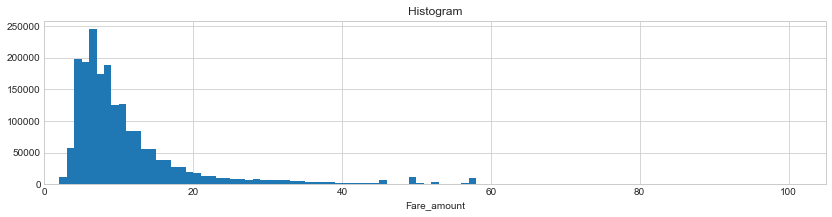

In [6]:
df_train[df_train.fare_amount < 100].fare_amount.hist(bins = 100 , figsize = (14,3))

plt.xlabel('Fare_amount')
plt.title('Histogram')
plt.xlim(0,)

In [7]:
df_train.nunique()

key                  1957504
fare_amount             2662
pickup_datetime      1609724
pickup_longitude      132824
pickup_latitude       168343
dropoff_longitude     164218
dropoff_latitude      208504
passenger_count            8
dtype: int64

In [8]:
print("Old Size : ", len(df_train))
df_train = df_train[df_train.fare_amount >= 0]
print("New Size : ", len(df_train))


Old Size :  1957504
New Size :  1957504


In [9]:
df_train.isnull().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [10]:
df_train = df_train.dropna(how = 'any' ,axis = 0)

In [11]:
len(df_train)

1957504

In [12]:
df_test = pd.read_csv('test.csv' , parse_dates = ['pickup_datetime'])

In [13]:
df_test.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


In [14]:
bb_longitude = min(df_test.pickup_longitude.min(),df_test.dropoff_longitude.min()),\
max(df_test.pickup_longitude.max(),df_test.dropoff_longitude.max()) 

print(bb_longitude)

(-74.263242, -72.986532)


In [15]:
bb_latitude = min(df_test.pickup_latitude.min(),df_test.dropoff_latitude.min()),\
max(df_test.pickup_latitude.max(),df_test.dropoff_latitude.max()) 

print(bb_latitude)

(40.568973, 41.709555)


In [16]:
def select_within_boundingbox(df , BB):
    return (df.pickup_longitude  >= bb_longitude[0]) & (df.pickup_longitude  <=  bb_longitude[1]) & (df.pickup_latitude >= bb_latitude[0]) & (df.pickup_latitude <= bb_latitude[1]) & (df.dropoff_longitude  >= bb_longitude[0]) & (df.dropoff_longitude  <=  bb_longitude[1]) &(df.dropoff_latitude >= bb_latitude[0]) & (df.dropoff_latitude <= bb_latitude[1])

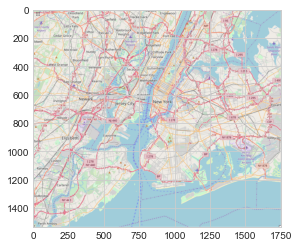

In [17]:
bb = (-74.5, -72.8, 40.5, 41.8)
nyc_map = plt.imread('nyc_2.png')

bb_zoom = (-74.3, -73.7, 40.5, 40.9)
nyc_map_zoom = plt.imread('nyc_1.png')

plt.imshow(nyc_map_zoom)
plt.show()

In [18]:
print('Old size : %d' % len(df_train))
df_train = df_train[select_within_boundingbox(df_train , bb)]
print('New Size : %d' % len(df_train))


Old size : 1957504
New Size : 1957504


In [19]:
def plot_on_map(df, bb , nyc_map , s=10 ,alpha = 0.3):
    fig , axs= plt.subplots(1,2 , figsize =(16,10))
    axs[0].scatter(df.pickup_longitude , df.pickup_latitude , zorder = 1 ,alpha = alpha , c = 'g' , s = 10)
    axs[0].set_xlim(bb[0] , bb[1])
    axs[0].set_ylim(bb[2] , bb[3])
    axs[0].set_title("Pickup Locations")
    axs[0].imshow(nyc_map,zorder = 0, extent = bb)
    
    
    axs[1].scatter(df.pickup_longitude , df.pickup_latitude , zorder = 1 ,alpha = alpha , c = 'r' , s = 10)
    axs[1].set_xlim(bb[0] , bb[1])
    axs[1].set_ylim(bb[2] , bb[3])
    axs[1].set_title("Pickup Locations")
    axs[1].imshow(nyc_map,zorder = 0, extent = bb)
    
    

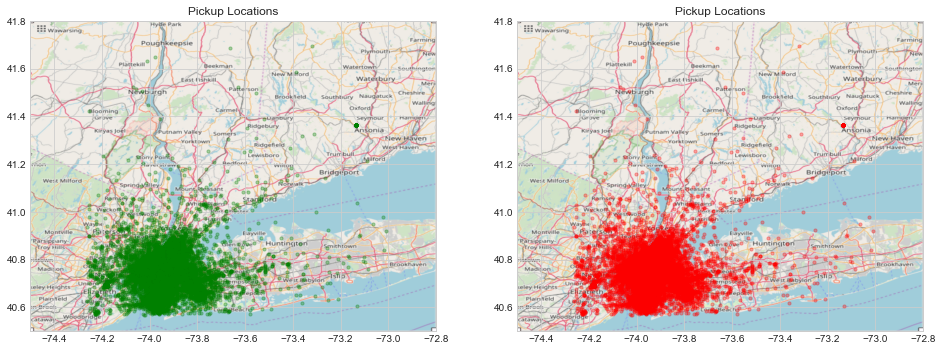

In [20]:
plot_on_map(df_train, bb, nyc_map, s=1, alpha=0.3)

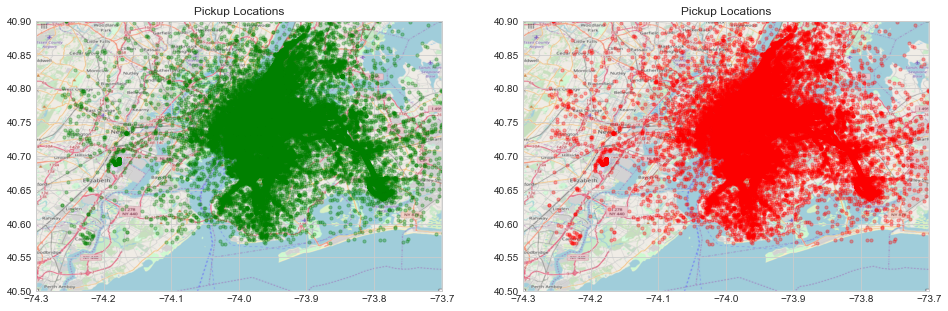

In [21]:

plot_on_map(df_train, bb_zoom, nyc_map_zoom, s=1, alpha=0.3)

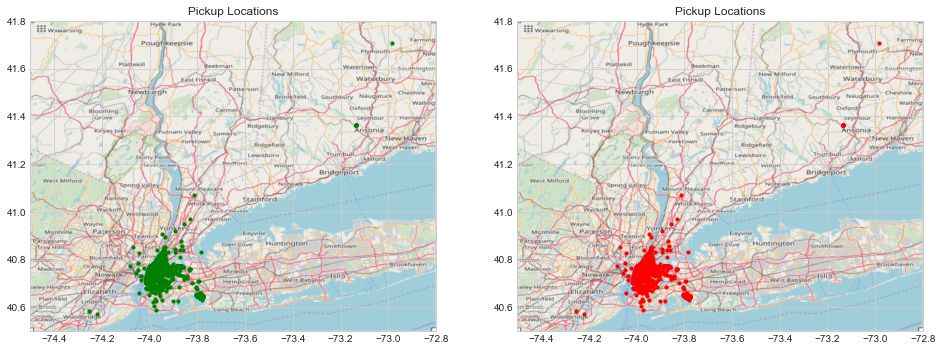

In [22]:
plot_on_map(df_test , bb , nyc_map , s=20 , alpha = 1.0)

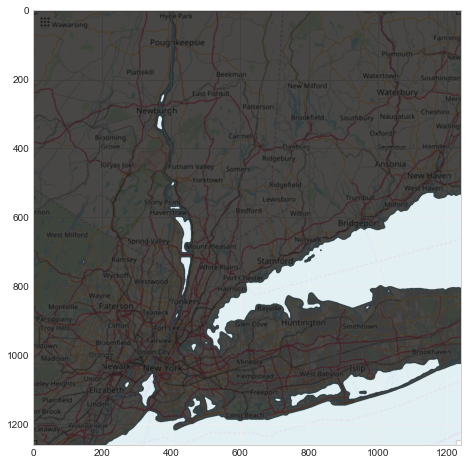

In [23]:
nyc_mask = plt.imread("nyc_photoshop.png")[:,:,0]>0.9
plt.figure(figsize = (8,8))
plt.imshow(nyc_map , zorder = 0)
plt.imshow(nyc_mask , zorder = 1 , alpha = 0.7)

In [24]:
def lanlat_to_xy(long , lat , dx , dy , BB):
    return(dx*(long - BB[0])/(BB[1]-BB[0])).astype('int') ,\
          (dy*(lat - BB[2])/(BB[3]-BB[2])).astype('int')

In [25]:
pickup_x , pickup_y = lanlat_to_xy(df_train.pickup_longitude, df_train.pickup_latitude, \
                                   nyc_mask.shape[1], nyc_mask.shape[0], bb)
dropoff_x , dropoff_y = lanlat_to_xy(df_train.dropoff_longitude, df_train.dropoff_latitude, \
                                   nyc_mask.shape[1], nyc_mask.shape[0], bb)

In [26]:
idx = (nyc_mask[pickup_y, pickup_x] & nyc_mask[dropoff_y, dropoff_x])
print("No. of trips in the water : {})".format(np.sum(~idx)))

No. of trips in the water : 196607)


In [27]:
def remove_datapoints_from_water(df):
    def lanlat_to_xy(long , lat , dx , dy , BB):
        return(dx*(long - BB[0])/(BB[1]-BB[0])).astype('int') ,\
              (dy*(lat - BB[2])/(BB[3]-BB[2])).astype('int')
    
    BB = (-74.5, -72.8, 40.5, 41.8)
    
    nyc_mask = plt.imread("nyc_photoshop.png")[:,:,0]>0.9
    
    pickup_x , pickup_y = lanlat_to_xy(df.pickup_longitude, df.pickup_latitude, \
                                   nyc_mask.shape[1], nyc_mask.shape[0], BB)
    dropoff_x , dropoff_y = lanlat_to_xy(df.dropoff_longitude, df.dropoff_latitude, \
                                   nyc_mask.shape[1], nyc_mask.shape[0], BB)
    
    idx = nyc_mask[pickup_y, pickup_x] & nyc_mask[dropoff_y, dropoff_x]
    
    return df[idx]
    
    

In [28]:
print("Old data : " , len(df_train))
df_train = remove_datapoints_from_water(df_train)
print("New data : " , len(df_train))

Old data :  1957504
New data :  1760897


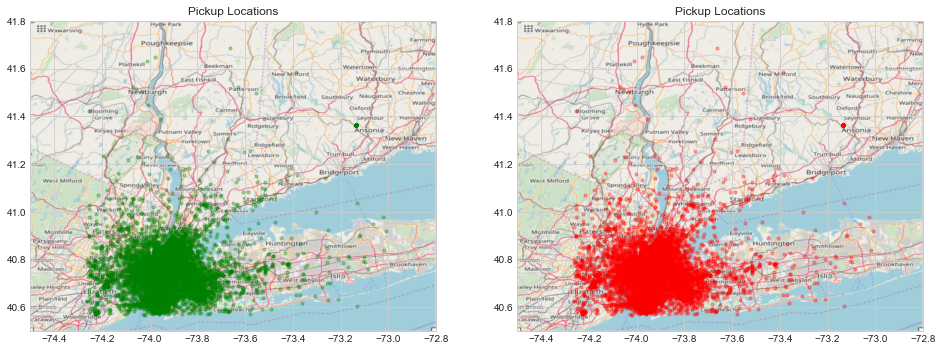

In [29]:
plot_on_map(df_train , bb , nyc_map)

In [41]:
def distance(lat1, lon1, lat2, lon2):
    p = 3.141/180
    a = 0.5 - np.cos((lat2-lat1)*p)/2 + np.cos(lat1*p) * np.cos(lat2*p) * (1-np.cos((lon2-lon1)*p))/2
    return 12742 * np.arcsin(np.sqrt(a))


In [45]:
df_train['distance_miles'] = distance(df_train.pickup_latitude, df_train.pickup_longitude, \
                                     df_train.dropoff_latitude, df_train.dropoff_longitude)

df_train['hour'] = df_train.pickup_datetime.apply(lambda t: pd.to_datetime(t).hour)
df_train['year'] = df_train.pickup_datetime.apply(lambda t: pd.to_datetime(t).year)

In [46]:
df_test['distance_miles'] = distance(df_test.pickup_latitude, df_test.pickup_longitude, \
                                     df_test.dropoff_latitude, df_test.dropoff_longitude)
df_test['hour'] = df_test.pickup_datetime.apply(lambda t: pd.to_datetime(t).hour)
df_test['year'] = df_test.pickup_datetime.apply(lambda t: pd.to_datetime(t).year)

In [47]:
df_train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,distance_miles,hour,year
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,1.030575,1.030575,17,2009
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,8.448671,8.448671,16,2010
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2.798748,2.798748,4,2012
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,1.998833,1.998833,7,2010
5,2011-01-06 09:50:45.0000002,12.1,2011-01-06 09:50:45+00:00,-74.000964,40.731630,-73.972892,40.758233,1,3.786695,3.786695,9,2011


In [50]:
idx = (df_train.passenger_count!=0)

In [51]:
features = ['year', 'hour', 'distance_miles', 'passenger_count']
X = df_train[idx][features].values
y = df_train[idx]['fare_amount'].values

In [54]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X , y ,test_size = 0.3)

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

model_lin = Pipeline((
        ("standard_scaler", StandardScaler()),
        ("lin_reg", LinearRegression()),
    ))
model_lin.fit(X_train, y_train)

y_train_pred = model_lin.predict(X_train)

y_test_pred = model_lin.predict(X_test)


In [58]:
#accuracy of model

def mse(y_true , y_pred):
    return np.mean((y_true - y_pred)**2)

In [60]:
print("Accuracy of model in training set : " , mse(y_train , y_train_pred))

Accuracy of model in training set :  30.618709783342606


In [61]:
print("Accuracy of model in training set : " , mse(y_test , y_test_pred))

Accuracy of model in training set :  32.05525574445741


In [62]:
from sklearn.metrics import r2_score

print("R2_score of model in training set : " , r2_score(y_train , y_train_pred))
print("R2_score of model in test set : " , r2_score(y_test , y_test_pred))

R2_score of model in training set :  0.6772237896396129
R2_score of model in test set :  0.6639170708442019
